In [49]:
import os
import pandas as pd
import yellowbrick as yb 
import matplotlib.pyplot as plt
import numpy as np
from yellowbrick.features.rankd import Rank2D 


# Read Data
df = pd.read_csv('dataset-1min.csv', usecols=['temperature_f', 'humidity', 'co2', 'light', 'light_status', 'noise', 'bluetooth_devices', 'image_hist_change', 'door_status', 'occupancy_count', 'occupancy_category'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12824 entries, 0 to 12823
Data columns (total 11 columns):
temperature_f         12824 non-null float64
humidity              12824 non-null float64
co2                   12824 non-null float64
light                 12824 non-null float64
light_status          12824 non-null object
noise                 12824 non-null float64
bluetooth_devices     12824 non-null float64
image_hist_change     12824 non-null float64
door_status           12824 non-null object
occupancy_count       12824 non-null float64
occupancy_category    12824 non-null object
dtypes: float64(8), object(3)
memory usage: 1.1+ MB


,temperature_f,humidity,co2,light,light_status,noise,bluetooth_devices,image_hist_change,door_status,occupancy_count,occupancy_category
0,72.68,36.9,781.0,430.000000,light-on,511.000000,1.0,15.242697,closed,0.0,very-low
1,72.68,36.9,781.0,430.000000,light-on,511.000000,1.0,15.242697,closed,0.0,very-low
2,74.84,38.9,789.0,437.000000,light-on,491.000000,16.0,15.242697,closed,0.0,very-low
3,74.84,38.9,789.0,437.000000,light-on,491.000000,16.0,15.242697,closed,0.0,very-low
4,74.93,38.8,766.0,421.653846,light-on,506.586957,25.0,15.242697,closed,15.0,low


In [50]:
# Construct a new dataframe with object columns only 

obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,light_status,door_status,occupancy_category
0,light-on,closed,very-low
1,light-on,closed,very-low
2,light-on,closed,very-low
3,light-on,closed,very-low
4,light-on,closed,low


In [51]:
# Encode categorical values

from sklearn.preprocessing import LabelEncoder


lb_make = LabelEncoder()
obj_df["occupancy_new"] = lb_make.fit_transform(obj_df["occupancy_category"])
obj_df[["occupancy_category", "occupancy_new"]].head(11)

,occupancy_category,occupancy_new
0,very-low,3
1,very-low,3
2,very-low,3
3,very-low,3
4,low,2
5,low,2
6,high,1
7,high,1
8,high,1
9,high,1


In [52]:
obj_df["light_new"] = lb_make.fit_transform(obj_df["light_status"])
obj_df[["light_status", "light_new"]].head(11)

,light_status,light_new
0,light-on,1
1,light-on,1
2,light-on,1
3,light-on,1
4,light-on,1
5,light-on,1
6,light-on,1
7,light-on,1
8,light-on,1
9,light-on,1


In [53]:
obj_df["door_new"] = lb_make.fit_transform(obj_df["door_status"])
obj_df[["door_status", "door_new"]].head(11)

,door_status,door_new
0,closed,0
1,closed,0
2,closed,0
3,closed,0
4,closed,0
5,closed,0
6,closed,0
7,closed,0
8,closed,0
9,closed,0


In [54]:
obj_df

,light_status,door_status,occupancy_category,occupancy_new,light_new,door_new
0,light-on,closed,very-low,3,1,0
1,light-on,closed,very-low,3,1,0
2,light-on,closed,very-low,3,1,0
3,light-on,closed,very-low,3,1,0
4,light-on,closed,low,2,1,0
5,light-on,closed,low,2,1,0
6,light-on,closed,high,1,1,0
7,light-on,closed,high,1,1,0
8,light-on,closed,high,1,1,0
9,light-on,closed,high,1,1,0


In [55]:
# Construct dataset with new encoded columns

dataset = pd.concat([df, obj_df[['occupancy_new', 'light_new', 'door_new']]], axis=1)
dataset

,temperature_f,humidity,co2,light,light_status,noise,bluetooth_devices,image_hist_change,door_status,occupancy_count,occupancy_category,occupancy_new,light_new,door_new
0,72.68,36.90,781.000000,430.000000,light-on,511.000000,1.0,15.242697,closed,0.0,very-low,3,1,0
1,72.68,36.90,781.000000,430.000000,light-on,511.000000,1.0,15.242697,closed,0.0,very-low,3,1,0
2,74.84,38.90,789.000000,437.000000,light-on,491.000000,16.0,15.242697,closed,0.0,very-low,3,1,0
3,74.84,38.90,789.000000,437.000000,light-on,491.000000,16.0,15.242697,closed,0.0,very-low,3,1,0
4,74.93,38.80,766.000000,421.653846,light-on,506.586957,25.0,15.242697,closed,15.0,low,2,1,0
5,74.93,38.80,766.000000,421.653846,light-on,506.586957,25.0,15.242697,closed,15.0,low,2,1,0
6,75.02,38.80,784.000000,431.000000,light-on,502.000000,34.0,15.242697,closed,30.0,high,1,1,0
7,75.02,38.80,784.000000,431.000000,light-on,502.000000,34.0,15.242697,closed,30.0,high,1,1,0
8,75.20,38.80,792.000000,441.000000,light-on,500.000000,37.0,15.242697,closed,30.0,high,1,1,0
9,75.20,38.80,792.000000,441.000000,light-on,500.000000,37.0,15.242697,closed,30.0,high,1,1,0


In [56]:
features = ['humidity', 'co2', 'light', 'light_new', 'noise', 'bluetooth_devices', 'door_new', 'image_hist_change', 'occupancy_count']
target   = ['occupancy_new']

X = dataset[features]
y = dataset[target]

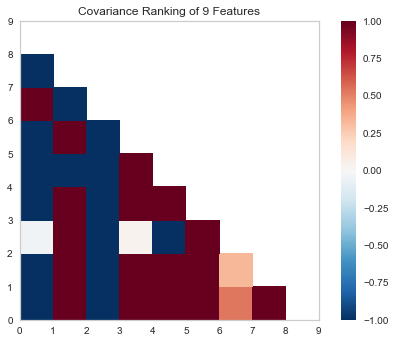

In [57]:
# RANK 2D
# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

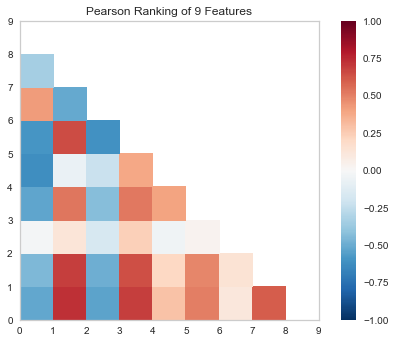

In [58]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None. 
    """
    
    def __init__(self, columns=None):
        self.columns  = [col for col in columns] 
        self.encoders = None
    
    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode. 
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns 
        
        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns 
        }
        return self

    def transform(self, data):
        """
        Uses the encoders to transform a data frame. 
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])
        
        return output

In [60]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline


def model_selection(X, y, estimator):
    """
    Test various estimators.
    """ 
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())), 
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y)  
    
    expected  = y
    predicted = model.predict(X)
    
    # Compute and return the F1 score (the harmonic mean of precision and recall)
    return (f1_score(expected, predicted, average='micro'))

In [61]:
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

In [62]:
model_selection(X, y, LinearSVC(),)

1.0

In [63]:
model_selection(X, y, KNeighborsClassifier())

0.9834684965689332

In [64]:
model_selection(X, y, LogisticRegressionCV())

1.0

In [65]:
model_selection(X, y, RandomForestClassifier())

1.0

In [66]:
model_selection(X, y, ExtraTreesClassifier())

1.0

In [67]:
model_selection(X, y, BaggingClassifier())

1.0

In [68]:
model_selection(X, y, LogisticRegression())

1.0

In [69]:
model_selection(X, y, SVC())

0.82992825951341231

In [473]:
model_selection(X, y, SGDClassifier())

1.0

In [70]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visual_model_selection(X, y, estimator):
    """
    Test various estimators.
    """ 
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())), 
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(model, classes=['low', 'very-low', 'fair', 'high'])
    visualizer.fit(X, y)  
    visualizer.score(X, y)
    visualizer.poof()  

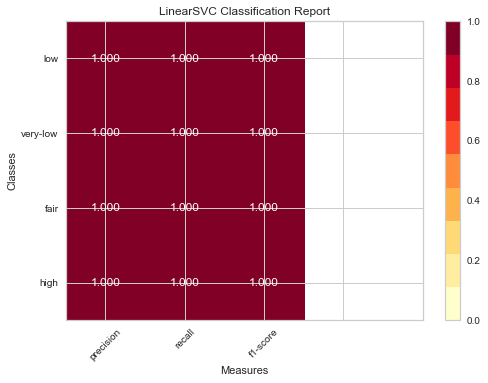

In [71]:
visual_model_selection(X, y, LinearSVC())

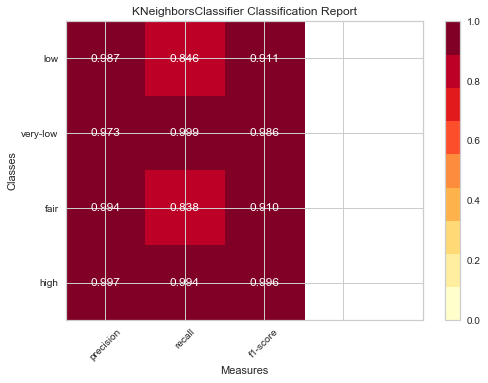

In [72]:
visual_model_selection(X, y, KNeighborsClassifier())

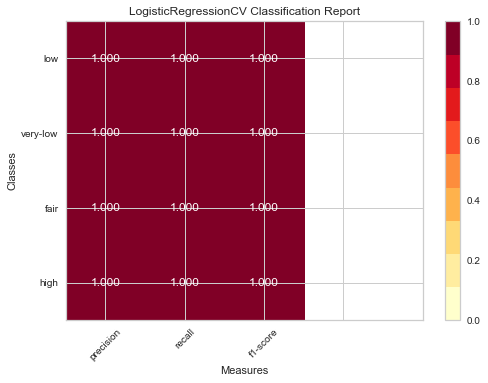

In [73]:
visual_model_selection(X, y, LogisticRegressionCV())

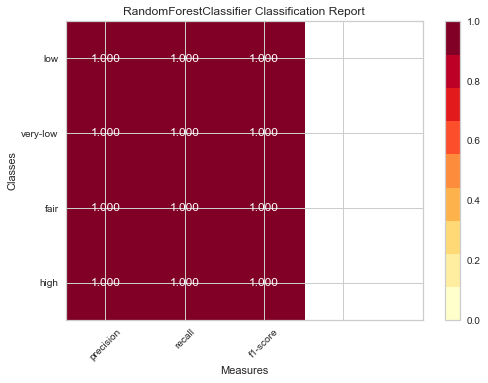

In [74]:
visual_model_selection(X, y, RandomForestClassifier())

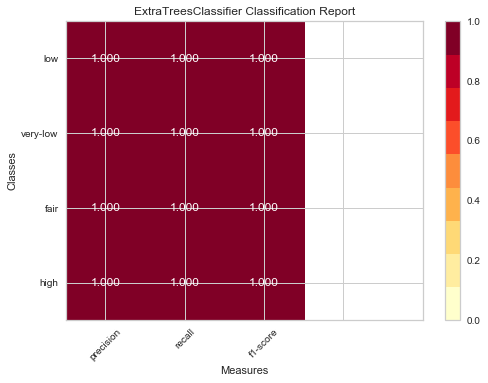

In [75]:
visual_model_selection(X, y, ExtraTreesClassifier())

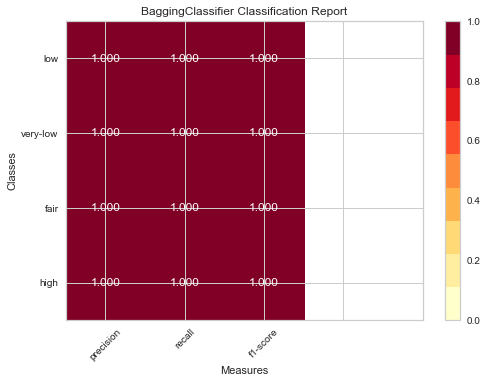

In [76]:
visual_model_selection(X, y, BaggingClassifier())

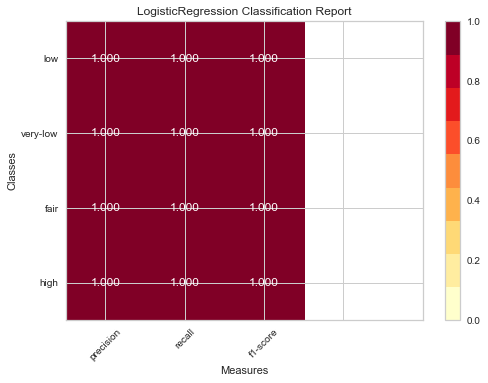

In [77]:
visual_model_selection(X, y, LogisticRegression())

/Users/svetlanazolotareva/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


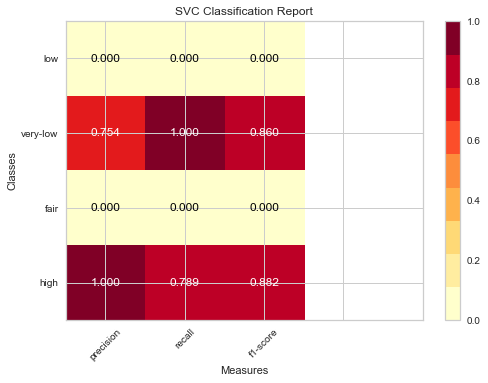

In [78]:
visual_model_selection(X, y, SVC())

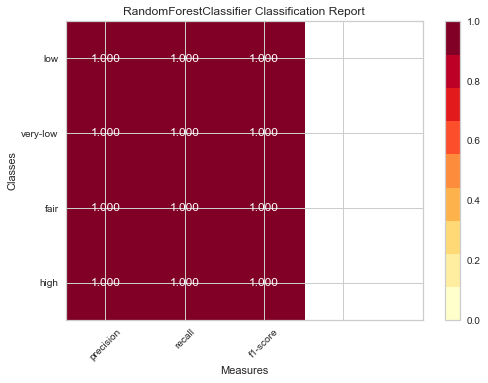

In [79]:
visual_model_selection(X, y, RandomForestClassifier())